# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [9]:
# Your code here
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
data_sample = data.sample(n=100000)

In [5]:
data_sample.reset_index(inplace=True)

In [21]:
data_sample

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3273221,251,CASH_OUT,174971.27,C331096009,25212.00,0.00,C618102036,154653.85,329625.11,0,0
1,4219704,306,CASH_OUT,21718.36,C298173404,0.00,0.00,C2049820493,143260.69,164979.05,0,0
2,676597,36,PAYMENT,15300.24,C1823944185,182.00,0.00,M96952828,0.00,0.00,0,0
3,753595,38,PAYMENT,8529.27,C1157393878,30180.00,21650.73,M1779139568,0.00,0.00,0,0
4,5103255,355,CASH_OUT,18251.28,C940220538,0.00,0.00,C503567320,5943415.98,5961667.26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5719414,398,PAYMENT,29633.19,C1118192445,6593.00,0.00,M219158567,0.00,0.00,0,0
99996,5825888,402,PAYMENT,4840.95,C411361339,0.00,0.00,M1811786593,0.00,0.00,0,0
99997,972994,44,CASH_IN,119366.46,C911716823,1613485.14,1732851.61,C1983026804,1045606.33,926239.87,0,0
99998,4746296,333,PAYMENT,16271.19,C1611973093,140.00,0.00,M1729066567,0.00,0.00,0,0


In [36]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           100000 non-null  int64  
 1   step            100000 non-null  int64  
 2   type            100000 non-null  object 
 3   amount          100000 non-null  float64
 4   nameOrig        100000 non-null  object 
 5   oldbalanceOrg   100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   isFraud         100000 non-null  int64  
 9   isFlaggedFraud  100000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 7.6+ MB


### What is the distribution of the outcome? 

In [18]:
data_sample['isFraud'].value_counts()
#Data is imbalanced

0    99864
1      136
Name: isFraud, dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [ ]:
# Step is the number of hours, so there is no need to transform this data.

### Run a logisitc regression classifier and evaluate its accuracy.

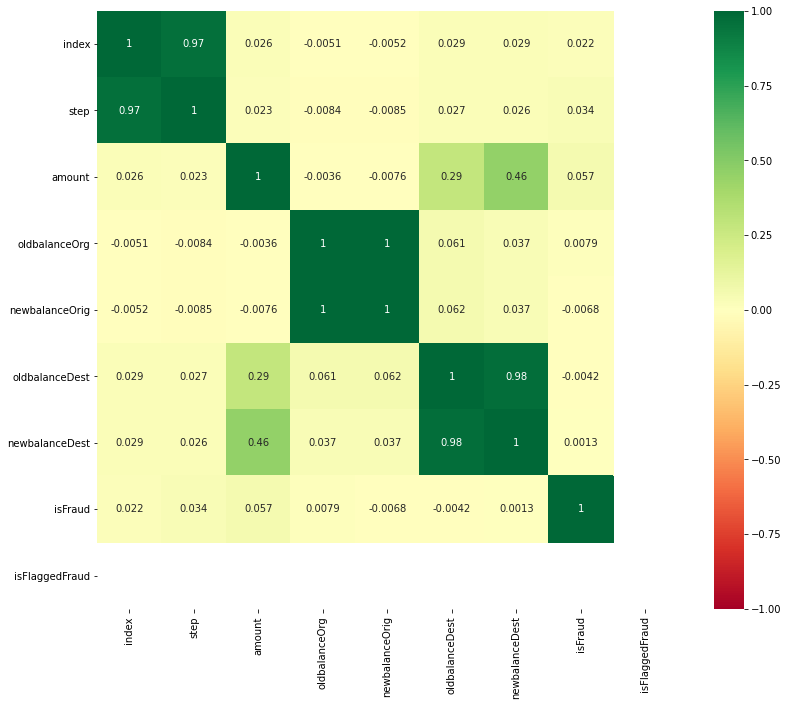

In [20]:
# Your code here
import matplotlib.pyplot as plt

corr=data_sample.corr()
fig, ax = plt.subplots(figsize = (13,11))
sns.heatmap(corr, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

In [22]:
data_sample.drop('newbalanceOrig',axis=1,inplace=True)

In [24]:
data_sample.drop('newbalanceDest',axis=1,inplace=True)

KeyError: "['newbalanceDest'] not found in axis"

In [37]:
data_sample.drop(['type','nameOrig','nameDest'],axis=1,inplace=True)

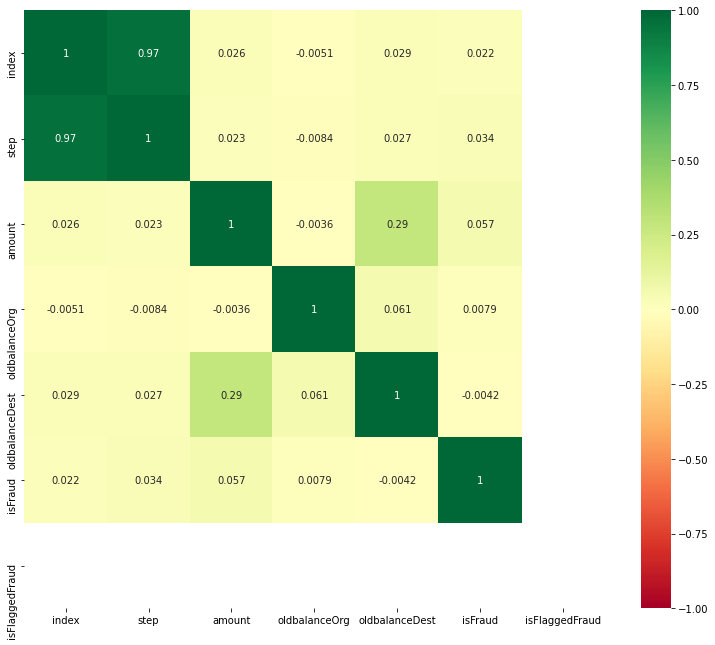

In [27]:
corr=data_sample.corr()
fig, ax = plt.subplots(figsize = (13,11))
sns.heatmap(corr, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
y=data_sample['isFraud']
X=data_sample.drop('isFraud',axis=1)

In [40]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [41]:
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [42]:
model.classes_

array([0, 1])

In [43]:
model.intercept_

array([-2.84239181e-10])

In [44]:
model.coef_

array([[-3.38829970e-06,  2.11721449e-09, -3.57157431e-07,
        -4.62721287e-07, -3.01062185e-06,  0.00000000e+00]])

In [45]:
model.predict_proba(X)

array([[9.99991109e-01, 8.89141138e-06],
       [9.99999602e-01, 3.98052404e-07],
       [9.08716419e-01, 9.12835806e-02],
       ...,
       [9.99278854e-01, 7.21146398e-04],
       [9.99999897e-01, 1.03081195e-07],
       [9.99995456e-01, 4.54377546e-06]])

In [46]:
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
confusion_matrix(y, model.predict(X))

array([[99864,     0],
       [  136,     0]])

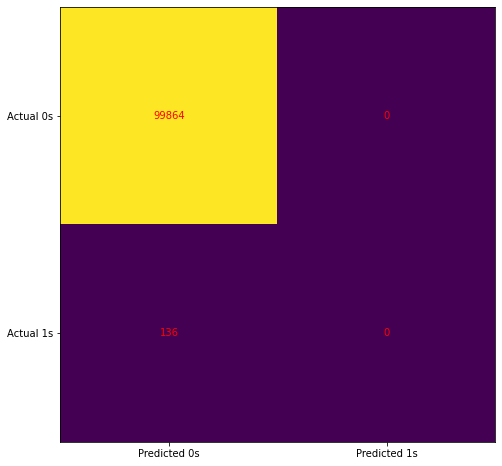

In [50]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
# So we need to do upsampling

### Now pick a model of your choice and evaluate its accuracy.

In [54]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split


y=data_sample['isFraud']
X=data_sample.drop('isFraud', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

X = pd.concat([X_train, y_train], axis = 1)

not_fraud = X[X.isFraud==0]
fraud = X[X.isFraud==1]

fraud_upsampled = resample(fraud,
                          replace=True,
                          n_samples=len(not_fraud),
                          random_state=27)

In [63]:
data_up = pd.concat([data_sample,fraud_upsampled]) 

In [64]:
#Run the logistic regression again
y=data_up['isFraud']
X=data_up.drop('isFraud',axis=1)

In [65]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [66]:
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [67]:
model.classes_

array([0, 1])

In [68]:
model.intercept_

array([-7.42677684e-12])

In [69]:
model.coef_

array([[-3.25549243e-08,  7.42444682e-10,  1.39643557e-06,
        -2.51085389e-07, -2.92772114e-07,  0.00000000e+00]])

In [70]:
model.predict_proba(X)

array([[0.47847129, 0.52152871],
       [0.53717785, 0.46282215],
       [0.50017661, 0.49982339],
       ...,
       [0.54908731, 0.45091269],
       [0.00536742, 0.99463258],
       [0.51328019, 0.48671981]])

In [71]:
model.predict(X)

array([1, 0, 0, ..., 0, 1, 0])

In [72]:
confusion_matrix(y, model.predict(X))

array([[76123, 23741],
       [30124, 44915]])

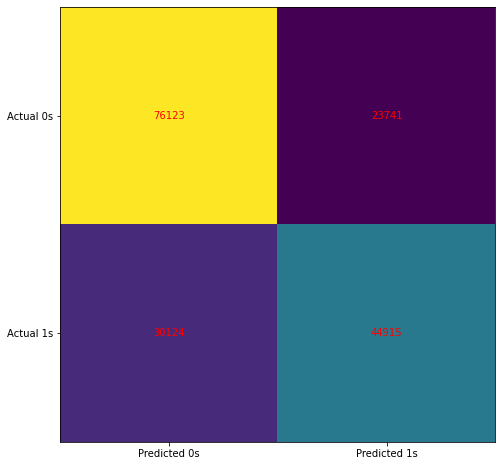

In [73]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [75]:
print(classification_report(y, model.predict(X)))
# Accuracy of 69%

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     99864
           1       0.65      0.60      0.63     75039

    accuracy                           0.69    174903
   macro avg       0.69      0.68      0.68    174903
weighted avg       0.69      0.69      0.69    174903



### Which model worked better and how do you know?

In [2]:
# Your response here
# I believe oversampling, since the amount of fraud is very low (136).

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.